In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [27]:
train_df=pd.read_csv("fraudTrain.csv")
test_df=pd.read_csv("fraudTest.csv")

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [30]:
train_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [31]:
is_fraud = train_df["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  7506
No:  1289169


In [32]:
print(train_df.isna().sum().sum())
print(train_df.duplicated().sum())

0
0


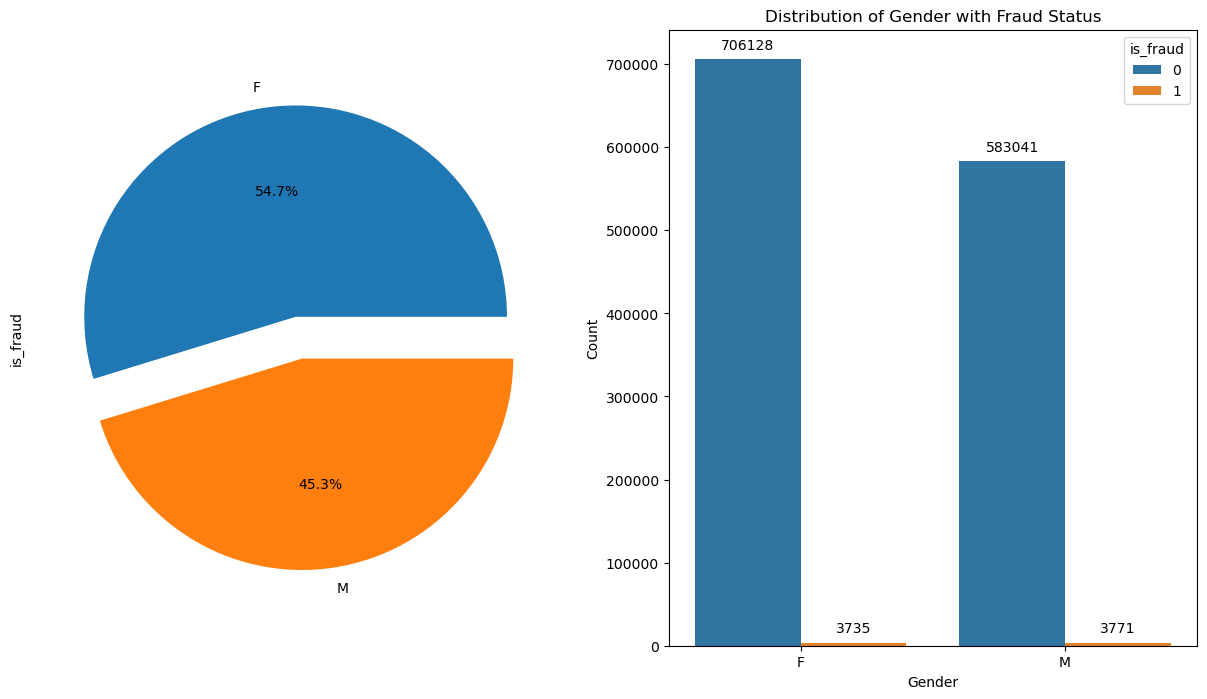

In [11]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
train_df.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=train_df,ax=axb[1])
# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

In [12]:
#Females are doing more transactions but males are more likely to make fraud transaction

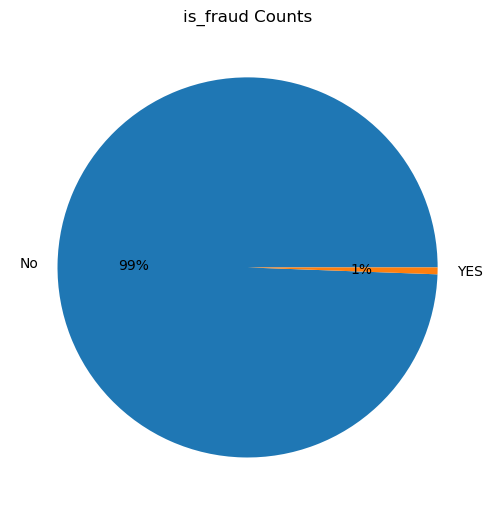

In [13]:
is_fraud = train_df["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_fraud, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [14]:
# 99% is not fraud and only 1% is fraud leads to imbalanced data

### Feature Engineering

In [33]:
#Change date type from obj to datetime
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

In [34]:
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour

train_df['month'] = train_df['trans_date_trans_time'].dt.month
test_df['month'] = test_df['trans_date_trans_time'].dt.month

train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


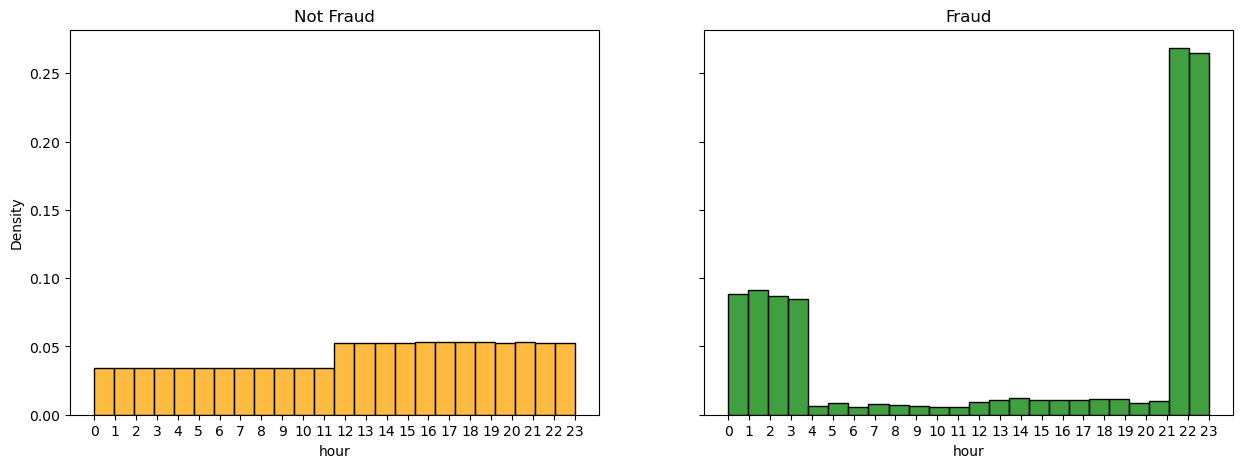

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='hour', data=train_df[train_df["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1, color="orange")

ax2 = sns.histplot(x='hour', data=train_df[train_df["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="green")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(np.arange(24)) # ticks of the day 0 -> 23
ax2.set_xticks(np.arange(24));

In [20]:
#It is clear that fraud transactions mainly occur at midnight.last 2 hours of the day

### Data Pre-processing

In [35]:
unique_transaction_count = len(train_df['trans_num'].unique())
print("Total count of unique transaction numbers:", unique_transaction_count)

Total count of unique transaction numbers: 1296675


In [36]:
# remove non-useful columns
columns_to_drop = ['Unnamed: 0','first', 'unix_time', 'dob', 'cc_num', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time']
train_df = train_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)
train_df.head(2)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1


In [37]:
#clean merchant column
train_df['merchant'] = train_df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   last        1296675 non-null  object 
 4   gender      1296675 non-null  object 
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   city_pop    1296675 non-null  int64  
 8   job         1296675 non-null  object 
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
 12  hour        1296675 non-null  int64  
 13  month       1296675 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 138.5+ MB


In [39]:
train_df.head(2)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1


In [40]:
train_df.describe(include='object')

,merchant,category,last,gender,job
count,1296675,1296675,1296675,1296675,1296675
unique,693,14,481,2,494
top,Kilback LLC,gas_transport,Smith,F,Film/video editor
freq,4403,131659,28794,709863,9779


## Data Encoding

In [41]:
from category_encoders import WOEEncoder

In [42]:
# applying label encoding
train_df['gender'] = train_df['gender'].map({'F': 0, 'M': 1})

# applying WOE encoding
for col in ['job','merchant', 'category', 'lat', 'last']:
    train_df[col] = WOEEncoder().fit_transform(train_df[col],train_df['is_fraud'])

In [43]:
train_df.head(3)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0.959326,0.924914,4.97,-2.469513,0,36.0788,-81.1781,3495,-1.080186,36.011293,-82.048315,0,0,1
1,0.663187,0.898799,107.23,-0.673638,0,48.8878,-118.2105,149,-0.904144,49.159047,-118.186462,0,0,1
2,-0.790166,-0.847622,220.11,0.433257,1,42.1808,-112.2620,4154,1.120434,43.150704,-112.154481,0,0,1


## Down-Sampling and Scaling

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [47]:
No_class = train_df[train_df["is_fraud"]==0]
yes_class = train_df[train_df["is_fraud"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)


X = down_samples.drop("is_fraud", axis=1)
y = down_samples["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
down_samples.head()

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
2449,0.738660,0.898799,281.06,-0.687725,1,35.9946,-81.7266,885,0.558075,36.430124,-81.179483,1,1,1
2472,0.020706,-0.209382,11.52,0.940098,0,29.4400,-98.4590,1595797,0.958027,29.819364,-99.142791,1,1,1
2523,0.813857,0.898799,276.31,0.940098,0,29.4400,-98.4590,1595797,0.958027,29.273085,-98.836360,1,3,1
2546,-0.044204,-0.209382,7.03,-0.687725,1,35.9946,-81.7266,885,0.558075,35.909292,-82.091010,1,3,1
2553,0.957816,0.898799,275.73,0.940098,0,29.4400,-98.4590,1595797,0.958027,29.786426,-98.683410,1,3,1


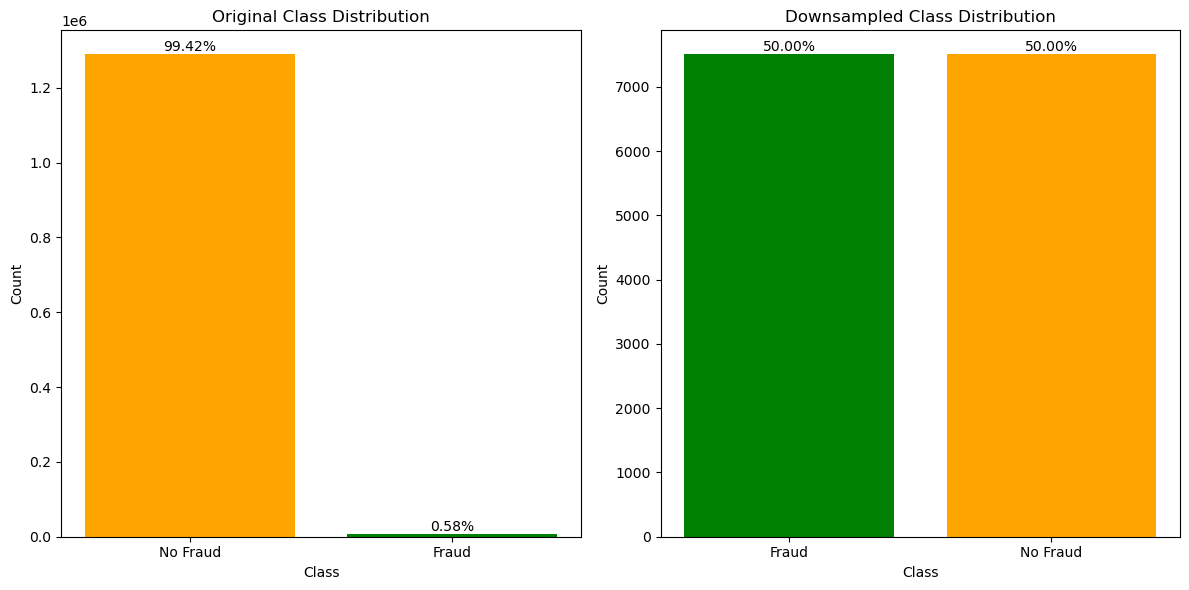

In [48]:
# Count the occurrences of each class in the original dataset
original_class_counts = train_df["is_fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts = down_samples["is_fraud"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(train_df) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100
# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha
             ='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['No Fraud', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

## Machine Learning model training

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,f1_score,recall_score

### Logistic Regression

In [59]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
LR_precision = precision_score(predict_LR,y_test)
LR_f1_score = f1_score(predict_LR,y_test)
LR_recall = recall_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))
print('Logistic Regression precision is: {:.2f}%'.format(LR_precision*100))
print('Logistic Regression f1_score is: {:.2f}%'.format(LR_f1_score*100))
print('Logistic Regression recall_score is: {:.2f}%'.format(LR_recall*100))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1486
           1       0.92      0.76      0.83      1517

    accuracy                           0.85      3003
   macro avg       0.85      0.85      0.84      3003
weighted avg       0.86      0.85      0.84      3003

Logistic Regression accuracy is: 84.52%
Logistic Regression precision is: 76.40%
Logistic Regression f1_score is: 83.29%
Logistic Regression recall_score is: 91.55%


### SVM

In [61]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
predict = svm_model.predict(X_test)

print(classification_report(y_test, predict))
svm_accuracy = accuracy_score(predict,y_test)
svm_precision = precision_score(predict,y_test)
svm_f1_score = f1_score(predict,y_test)
svm_recall = recall_score(predict,y_test)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))
print('SVC model precision is: {:.2f}%'.format(svm_precision*100))
print('SVC model f1_score is: {:.2f}%'.format(svm_f1_score*100))
print('SVC model recall_score is: {:.2f}%'.format(svm_recall*100))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1486
           1       0.92      0.74      0.82      1517

    accuracy                           0.84      3003
   macro avg       0.85      0.84      0.84      3003
weighted avg       0.85      0.84      0.84      3003

SVC model accuracy is: 83.82%
SVC model precision is: 74.36%
SVC model f1_score is: 82.28%
SVC model recall_score is: 92.08%


### Gaussian Naive Bayes

In [62]:
# Create and train the Gaussian Naive Bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_naive = NB_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_naive))
GaussianNB_accuracy = accuracy_score(y_pred_naive, y_test)
GaussianNB_precision = precision_score(y_pred_naive, y_test)
GaussianNB_f1_score = f1_score(y_pred_naive, y_test)
GaussianNB_recall_score = recall_score(y_pred_naive, y_test)
print('Naive Bayes model accuracy is: {:.2f}%'.format(GaussianNB_accuracy * 100))
print('Naive Bayes model precision is: {:.2f}%'.format(GaussianNB_precision * 100))
print('Naive Bayes model f1_score is: {:.2f}%'.format(GaussianNB_f1_score * 100))
print('Naive Bayes model recall is: {:.2f}%'.format(GaussianNB_recall_score * 100))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1486
           1       0.91      0.74      0.81      1517

    accuracy                           0.83      3003
   macro avg       0.84      0.83      0.83      3003
weighted avg       0.84      0.83      0.83      3003

Naive Bayes model accuracy is: 82.88%
Naive Bayes model precision is: 73.57%
Naive Bayes model f1_score is: 81.28%
Naive Bayes model recall is: 90.81%


### Decision Tree

In [63]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(X_train, y_train)
predict_ID3 = DT.predict(X_test)
print(classification_report(y_test, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,y_test)
ID3_precision = precision_score(predict_ID3,y_test)
ID3_f1_score = f1_score(predict_ID3,y_test)
ID3_recall = recall_score(predict_ID3,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))
print('ID3 model precision is: {:.2f}%'.format(ID3_precision*100))
print('ID3 model f1_score is: {:.2f}%'.format(ID3_f1_score*100))
print('ID3 model recall is: {:.2f}%'.format(ID3_recall*100))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1486
           1       0.97      0.74      0.84      1517

    accuracy                           0.86      3003
   macro avg       0.88      0.86      0.85      3003
weighted avg       0.88      0.86      0.85      3003

ID3 model accuracy is: 85.58%
ID3 model precision is: 73.70%
ID3 model f1_score is: 83.78%
ID3 model recall is: 97.05%


### Random Forest

In [66]:
# Initialize and train the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
RF_precision = precision_score(predict_RF, y_test)
RF_f1_score = f1_score(predict_RF, y_test)
RF_recall = recall_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))
print('Random Forest model precision is: {:.2f}%'.format(RF_precision * 100))
print('Random Forest model f1_score is: {:.2f}%'.format(RF_f1_score * 100))
print('Random Forest model recall is: {:.2f}%'.format(RF_recall * 100))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1486
           1       0.97      0.96      0.97      1517

    accuracy                           0.97      3003
   macro avg       0.97      0.97      0.97      3003
weighted avg       0.97      0.97      0.97      3003

Random Forest model accuracy is: 96.57%
Random Forest model precision is: 96.37%
Random Forest model f1_score is: 96.60%
Random Forest model recall is: 96.82%


### XG Boost

In [67]:
# Initialize and train the XGBoost classifier
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)

# Make predictions on the test set
predict_XGB = XGB.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test)
XGB_precision = precision_score(predict_XGB, y_test)
XGB_f1_score = f1_score(predict_XGB, y_test)
XGB_recall = recall_score(predict_XGB, y_test)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))
print('XGBoost model precision is: {:.2f}%'.format(XGB_precision * 100))
print('XGBoost model f1 score is: {:.2f}%'.format(XGB_f1_score * 100))
print('XGBoost model recall is: {:.2f}%'.format(XGB_recall * 100))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1486
           1       0.98      0.98      0.98      1517

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003

XGBoost model accuracy is: 97.70%
XGBoost model precision is: 97.96%
XGBoost model f1 score is: 97.73%
XGBoost model recall is: 97.51%


In [72]:
Algorithms = ['XGBClassifier', 'RandomForest', 'ID3', 'Logistic Regression', 'SVC', 'GaussianNB']
accuracy = [XGB_accuracy, RF_accuracy, ID3_accuracy, LR_accuracy, svm_accuracy, GaussianNB_accuracy]
precision = [XGB_precision,RF_precision,ID3_precision, LR_precision, svm_precision, GaussianNB_precision]
f1_score=[XGB_f1_score,RF_f1_score,ID3_f1_score, LR_f1_score, svm_f1_score, GaussianNB_f1_score]
recall_score = [XGB_recall,RF_recall,ID3_recall, LR_recall, svm_recall, GaussianNB_recall_score]
FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy, 'Precision':precision, 'F1_score':f1_score,'Recall':recall_score})

FinalResult

,Algorithm,Accuracy,Precision,F1_score,Recall
0,XGBClassifier,0.977023,0.979565,0.977310,0.975066
1,RandomForest,0.965701,0.963744,0.965973,0.968212
2,ID3,0.855811,0.736981,0.837767,0.970486
3,Logistic Regression,0.845155,0.764008,0.832914,0.915482
4,SVC,0.838162,0.743573,0.822757,0.920816
5,GaussianNB,0.828838,0.735662,0.812819,0.908055


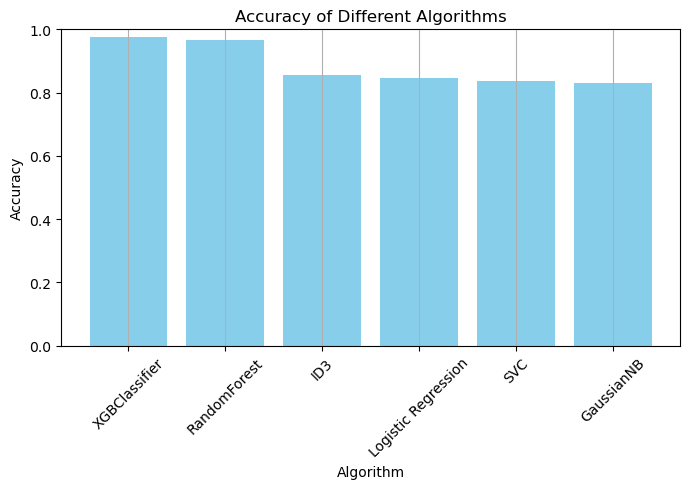

In [57]:
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

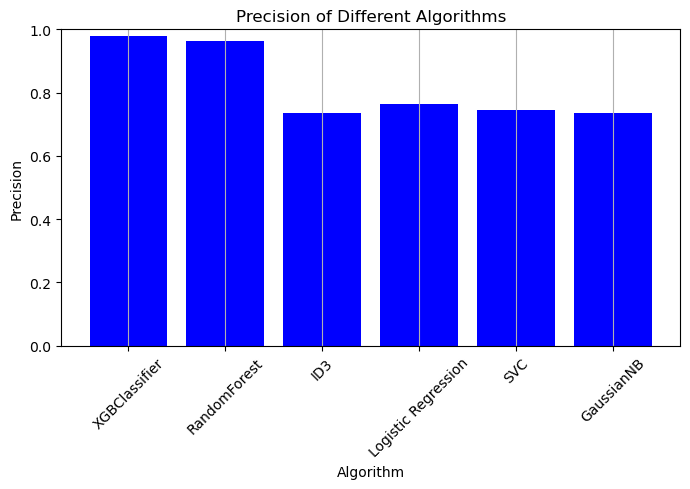

In [73]:
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Precision'], color='blue')
plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.title('Precision of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

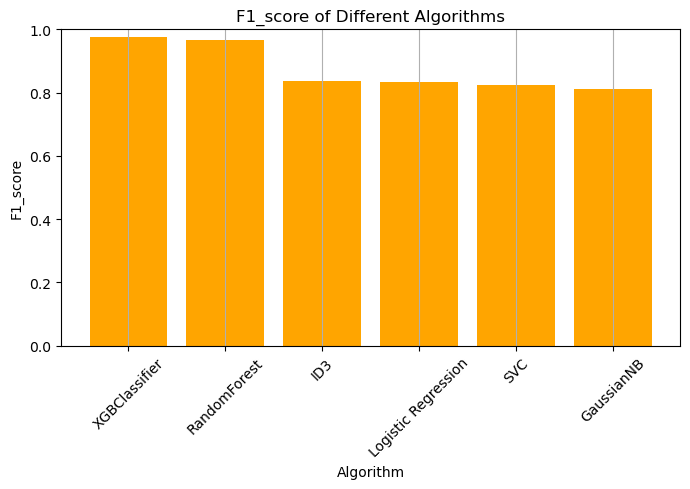

In [74]:
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['F1_score'], color='orange')
plt.xlabel('Algorithm')
plt.ylabel('F1_score')
plt.title('F1_score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

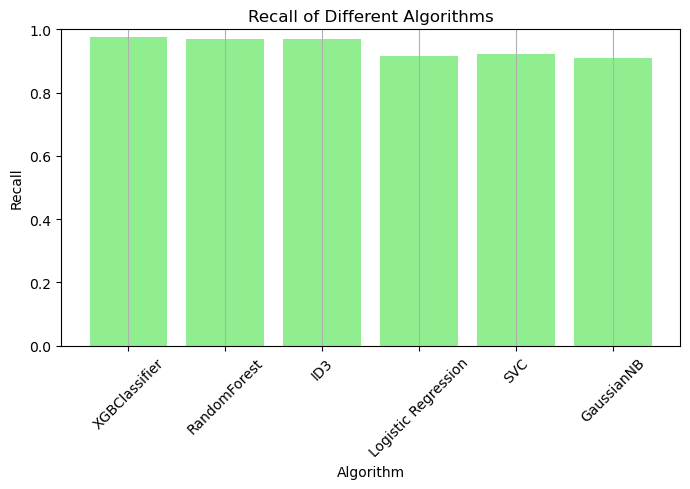

In [76]:
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Recall'], color='lightgreen')
plt.xlabel('Algorithm')
plt.ylabel('Recall')
plt.title('Recall of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [77]:
# After analyzing performance metrics of all algorithms XG Boost Classifier performs best

In [149]:
# Initialize and train the XGBoost classifier
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [79]:
import joblib

In [80]:
joblib.dump(XGB,'CreditCard_DetectionModel')

['CreditCard_DetectionModel']

In [81]:
model=joblib.load('CreditCard_DetectionModel')

In [95]:
model.predict([[0.738660,0.898799,281.06,-0.687725,1,35.9946,-81.7266,885,0.558075,36.430124,-81.179483,3,1]])

array([1])

In [96]:
model.predict([[0.738660,0.898799,281.06,-0.687725,1,35.9946,-81.7266,885,0.558075,36.430124,-81.179483,0,1]])

array([0])

In [99]:
model.predict([[0.81,-0.2,11.52,0.94,0,29.44,-98.45,1595797,0.95,29.81,-99.14,3,1]])

array([1])

#### Categorical User Input Transformation

In [122]:
from sklearn.preprocessing import StandardScaler
from category_encoders.woe import WOEEncoder

# Assuming 'train_df' is your training DataFrame
woe_encoders = {}
for col in ['job', 'merchant', 'category', 'lat', 'last']:
    woe_encoders[col] = WOEEncoder().fit(train_df[col], train_df['is_fraud'])

# Standard scaler for numerical columns
scaler = StandardScaler().fit(train_df[['amt', 'long', 'city_pop', 'merch_lat', 'merch_long', 'hour', 'month']])



In [150]:

# Mockup of pre-fitted WOEEncoders for each categorical column
woe_encoders = {
    'job': WOEEncoder(),
    'merchant': WOEEncoder(),
    'category': WOEEncoder(),
    'last': WOEEncoder()
}

# Example data for fitting the WOEEncoders (Replace this with actual data)
example_data = pd.DataFrame({
    'job': ['Psychologist,counselling', 'Engineer', 'Doctor'],
    'merchant': ['fraud_Rippin,Kub and Mann', 'shop_ABC', 'store_XYZ'],
    'category': ['misc_net', 'shopping_net', 'entertainment'],
    'last': ['Banks', 'Credit', 'Savings'],
    'amt': [4.97, 10.5, 7.8],  # Added for scaler fitting
    'lat': [36.0788, 40.7128, 34.0522],  # Added for scaler fitting
    'long': [-81.1781, -74.0060, -118.2437],  # Added for scaler fitting
    'city_pop': [3495, 8398748, 3990456],  # Added for scaler fitting
    'merch_lat': [36.011293, 40.712776, 34.052235],  # Added for scaler fitting
    'merch_long': [-82.048315, -74.005974, -118.243683],  # Added for scaler fitting
    'hour': [12, 14, 16],  # Added for scaler fitting
    'month': [1, 6, 11],  # Added for scaler fitting
    'target': [1, 0, 0]  # Example target variable
})

# Fitting the WOEEncoders (Replace this with actual fitting process)
for col in woe_encoders:
    woe_encoders[col].fit(example_data[[col]], example_data['target'])

# Fitting the StandardScaler
scaler = StandardScaler()
scaler.fit(example_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'hour', 'month']])

def preprocess_input(data, woe_encoders, scaler):
    # Convert dictionary to DataFrame
    df = pd.DataFrame([data])
    

    # Encode categorical variables using WOEEncoder
    categorical_columns = ['job', 'merchant', 'category', 'last']
    for col in categorical_columns:
        df[col] = woe_encoders[col].transform(df[[col]])
    
    
    # Map gender
    df['gender'] = df['gender'].map({'F': 0, 'M': 1})
    

    # Columns to scale
    numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'hour', 'month']
    
    # Normalize/Standardize numerical features
    df[numerical_columns] = scaler.transform(df[numerical_columns])
    

    return df

# Example single transaction data
transaction_data = {
    'merchant': 'fraud_Rippin,Kub and Mann',
    'category': 'misc_net',
    'amt': 4.97,
    'last': 'Banks',
    'gender': 'M',
    'lat': 36.0788,
    'long': -81.1781,
    'city_pop': 3495,
    'job': 'Psychologist,counselling',
    'merch_lat': 36.011293,
    'merch_long': -82.048315,
    'hour': 12,  # Assuming noon
    'month': 1   # January
}

# Preprocess the input data
processed_input = preprocess_input(transaction_data, woe_encoders, scaler)

# Ensure the processed input is a numpy array (XGBoost expects this format)
processed_input = np.array(processed_input)
print("Processed input:\n", processed_input)

# Make prediction
predicted_class = model.predict(processed_input)
predicted_proba = model.predict_proba(processed_input)[:, 1]

print(f"Predicted Class: {predicted_class[0]}")
print(f"Predicted Probability of Fraud: {predicted_proba[0]}")


Processed input:
 [[ 0.          0.         -1.23422835  0.          1.         -0.31176718
   0.51401112 -1.20375098  0.         -0.32707151  0.48773994 -1.22474487
  -1.22474487]]
Predicted Class: 1
Predicted Probability of Fraud: 0.7129198312759399


In [131]:
# import tkinter as tk
# from tkinter import messagebox
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from category_encoders import WOEEncoder
# import xgboost as xgb

In [148]:
# Load the trained model
# model=joblib.load('CreditCard_DetectionModel')

# Load the WOE encoders and scaler
# Assuming you have already fitted these encoders and scaler during training
# woe_encoders = {}
# for col in ['job', 'merchant', 'category', 'lat', 'last']:
#     woe_encoders[col] = WOEEncoder().fit(train_df[col], train_df['is_fraud'])

# # Standard scaler for numerical columns
# scaler = StandardScaler().fit(train_df[['amt', 'long', 'city_pop', 'merch_lat', 'merch_long', 'hour', 'month']])

# def preprocess_input(data):
#     # Convert dictionary to DataFrame
#     df = pd.DataFrame([data])
    
#     # Encode categorical variables using WOEEncoder
#     categorical_columns = ['job', 'merchant', 'category', 'last']
#     for col in categorical_columns:
#         df[col] = woe_encoders[col].transform(df[[col]])
    
    
#     # Map gender
#     df['gender'] = df['gender'].map({'F': 0, 'M': 1})
    

#     # Columns to scale
#     numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'hour', 'month']
    
#     # Normalize/Standardize numerical features
#     df[numerical_columns] = scaler.transform(df[numerical_columns])
    

#     return df

# def predict_fraud(transaction_data):
#     # Preprocess the input data
#     processed_input = preprocess_input(transaction_data)
    
#     # Ensure the processed input is a numpy array (XGBoost expects this format)
#     processed_input = np.array(processed_input)
    
#     # Make prediction
#     predicted_proba = model.predict(xgb.DMatrix(processed_input))
    
#     return predicted_proba[0]

# def predict_from_input():
#     transaction_data = {
#         'merchant': merchant_entry.get(),
#         'category': category_entry.get(),
#         'amt': float(amt_entry.get()),
#         'last': last_entry.get(),
#         'gender': gender_entry.get(),
#         'lat': float(lat_entry.get()),
#         'long': float(long_entry.get()),
#         'city_pop': int(city_pop_entry.get()),
#         'job': job_entry.get(),
#         'merch_lat': float(merch_lat_entry.get()),
#         'merch_long': float(merch_long_entry.get()),
#         'hour': int(hour_entry.get()),
#         'month': int(month_entry.get())
#     }
#     predicted_probability = predict_fraud(transaction_data)
#     messagebox.showinfo("Fraud Prediction", f"Predicted Probability of Fraud: {predicted_probability}")

# # Create the main window
# root = tk.Tk()
# root.title("Fraud Prediction")

# # Create input fields
# tk.Label(root, text="Merchant:").grid(row=0, column=0)
# merchant_entry = tk.Entry(root)
# merchant_entry.grid(row=0, column=1)

# tk.Label(root, text="Category:").grid(row=1, column=0)
# category_entry = tk.Entry(root)
# category_entry.grid(row=1, column=1)

# tk.Label(root, text="Amount:").grid(row=2, column=0)
# amt_entry = tk.Entry(root)
# amt_entry.grid(row=2, column=1)

# tk.Label(root, text="Last:").grid(row=3, column=0)
# last_entry = tk.Entry(root)
# last_entry.grid(row=3, column=1)

# tk.Label(root, text="Gender:").grid(row=4, column=0)
# gender_entry = tk.Entry(root)
# gender_entry.grid(row=4, column=1)

# tk.Label(root, text="Latitude:").grid(row=5, column=0)
# lat_entry = tk.Entry(root)
# lat_entry.grid(row=5, column=1)

# tk.Label(root, text="Longitude:").grid(row=6, column=0)
# long_entry = tk.Entry(root)
# long_entry.grid(row=6, column=1)

# tk.Label(root, text="City Population:").grid(row=7, column=0)
# city_pop_entry = tk.Entry(root)
# city_pop_entry.grid(row=7, column=1)

# tk.Label(root, text="Job:").grid(row=8, column=0)
# job_entry = tk.Entry(root)
# job_entry.grid(row=8, column=1)

# tk.Label(root, text="Merchant Latitude:").grid(row=9, column=0)
# merch_lat_entry = tk.Entry(root)
# merch_lat_entry.grid(row=9, column=1)

# tk.Label(root, text="Merchant Longitude:").grid(row=10, column=0)
# merch_long_entry = tk.Entry(root)
# merch_long_entry.grid(row=10, column=1)

# tk.Label(root, text="Hour:").grid(row=11, column=0)
# hour_entry = tk.Entry(root)
# hour_entry.grid(row=11, column=1)

# tk.Label(root, text="Month:").grid(row=12, column=0)
# month_entry = tk.Entry(root)
# month_entry.grid(row=12, column=1)


# # Create a button to make prediction
# predict_button = tk.Button(root, text="Predict", command=predict_from_input)
# predict_button.grid(row=14, columnspan=2)

# # Run the main event loop
# root.mainloop()
